<a href="https://colab.research.google.com/github/Abdulmukhtor/ML-Supervised--learning-2-bolim/blob/main/7-dars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, RobustScaler,StandardScaler
from sklearn. metrics import accuracy_score, r2_score, mean_absolute_error,mean_squared_error,root_mean_squared_error,classification_report,accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Date-Wise-Prices-all-Commodity.xlsx to Date-Wise-Prices-all-Commodity (1).xlsx


In [3]:
df=pd.read_excel('Date-Wise-Prices-all-Commodity.xlsx')
df.head()

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,Table1,0,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 1,FAQ,24/02/2023,4000,4100.0,4000.0
1,Table2,1,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 2,FAQ,24/02/2023,3000,3500.0,3500.0
2,Table3,2,Andhra Pradesh,Chittor,Chittoor,Gur(Jaggery),NO 3,FAQ,24/02/2023,2300,2300.0,2300.0
3,Table4,3,Andhra Pradesh,Chittor,Punganur,Tomato,Hybrid,FAQ,24/02/2023,1340,2000.0,1670.0
4,Table5,4,Andhra Pradesh,Chittor,Vayalapadu,Tomato,Local,FAQ,24/02/2023,640,2160.0,1400.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diffgr:id          6435 non-null   object 
 1   msdata:rowOrder    6435 non-null   int64  
 2   State              6435 non-null   object 
 3   District           6435 non-null   object 
 4   Market             6435 non-null   object 
 5   Commodity          6435 non-null   object 
 6   Variety            6435 non-null   object 
 7   Grade              6435 non-null   object 
 8   Arrival_Date       6435 non-null   object 
 9   Min_x0020_Price    6435 non-null   int64  
 10  Max_x0020_Price    6435 non-null   float64
 11  Modal_x0020_Price  6435 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 603.4+ KB


In [5]:
df.isnull().sum()

,0
diffgr:id,0
msdata:rowOrder,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Arrival_Date,0
Min_x0020_Price,0


In [6]:
df["Market"].unique()

array(['Chittoor', 'Punganur', 'Vayalapadu', 'Alur', 'Atmakur',
       'Banaganapalli', 'Nandikotkur', 'Gopalavaram', 'Bihiya', 'Kaimur',
       'Bahadurganj', 'Munghair', 'Nawada',
       'Parsoniya Mandi, Mahua block', 'Chandigarh(Grain/Fruit)',
       'Bhatgaon', 'Kasdol', 'Sarsiwan', 'Kusmee', 'Bilaspur',
       'Pendraroad', 'Sakri', 'Takhatpur', 'Tiphra', 'Gidam',
       'Belarbahara', 'Belargaon', 'Boraee', 'Gattasilli', 'Nagari',
       'Durg', 'Champa', 'Pathalgaon', 'Kawardha', 'Pipriya',
       'Bhanupratappur', 'Charama', 'Korar', 'Lakhanpuri', 'Narharpur',
       'Sambalpur', 'Manendragarh', 'Abhanpur', 'Arang', 'Rajnandgaon',
       'Pratappur', 'Surajpur', 'Sanquelim', 'Babra', 'Bagasara',
       'Damnagar', 'Vav', 'Ankleshwar', 'Jambusar', 'Jambusar(Kaavi)',
       'Botad(Haddad)', 'Dahod', 'Dahod(Veg. Market)', 'Dehgam',
       'Dehgam(Rekhiyal)', 'Mansa(Manas Veg Yard)', 'Bhanvad', 'Dhrol',
       'Kodinar', 'Kodinar(Dollasa)', 'Mangrol', 'Visavadar', 'Rapar',
       

In [15]:
df['Market'].value_counts()

,count
Market,
Palakkad,51
Manjeri,46
Thodupuzha,42
Saharanpur,40
Bikaner(F&V),40
...,...
Lakhanpuri,1
Charama,1
Alur,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   diffgr:id          6435 non-null   object 
 1   msdata:rowOrder    6435 non-null   int64  
 2   State              6435 non-null   object 
 3   District           6435 non-null   object 
 4   Market             6435 non-null   object 
 5   Commodity          6435 non-null   object 
 6   Variety            6435 non-null   object 
 7   Grade              6435 non-null   object 
 8   Arrival_Date       6435 non-null   object 
 9   Min_x0020_Price    6435 non-null   int64  
 10  Max_x0020_Price    6435 non-null   float64
 11  Modal_x0020_Price  6435 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 603.4+ KB


In [9]:
lbl=LabelEncoder()
for col in df.columns:
  if df[col].dtype=='object':
    df[col]=lbl.fit_transform(df[col])


In [10]:
df

,diffgr:id,msdata:rowOrder,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,0,0,0,50,124,85,222,0,0,4000,4100.0,4000.0
1,1111,1,0,50,124,85,223,0,0,3000,3500.0,3500.0
2,2222,2,0,50,124,85,224,0,0,2300,2300.0,2300.0
3,3333,3,0,50,453,166,155,0,0,1340,2000.0,1670.0
4,4444,4,0,50,570,166,192,0,0,640,2160.0,1400.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,6036,6430,25,235,155,118,269,0,0,1400,1500.0,1450.0
6431,6037,6431,25,235,155,133,169,0,0,760,800.0,780.0
6432,6038,6432,25,235,155,139,87,0,0,2700,2900.0,2800.0
6433,6039,6433,25,235,155,139,304,0,0,4700,4900.0,4800.0


In [11]:
df['District'].value_counts()

,count
District,
73,172
4,145
129,139
162,124
191,99
...,...
77,1
42,1
115,1


<Axes: >

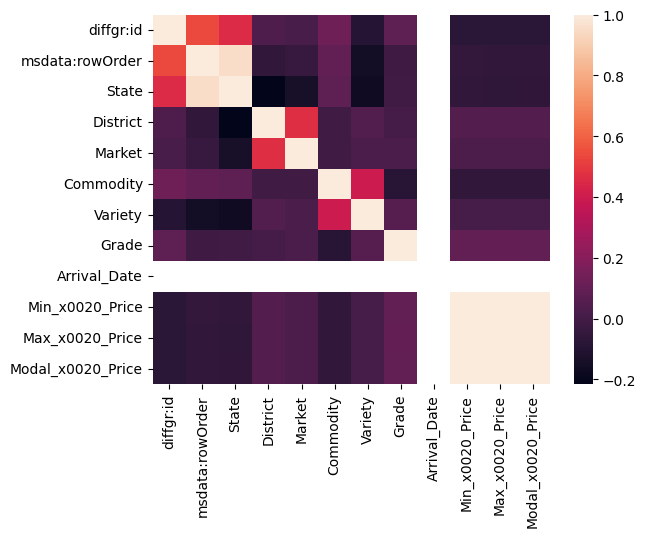

In [21]:
import seaborn as sns
sns.heatmap(data=df.corr()) # ustunlarning bir-biriga bog'liqligini ko'rsatib beradi

In [17]:
x=df.iloc[:,[4,5,6,7,9,10]].values # barcha ustunlardagi tanlangan indeksli ustunlarrni features sifatida tanlab oladi , values numpy massivlarga aylantiradi
y=df.iloc[:,-1].values #  barcha ustunlardan indeks bo'yicha eng oxirgi elementni target sifatida oladi, iloc =

In [24]:
s1=StandardScaler()
x=s1.fit_transform(x)

In [25]:
e1=x.mean()  #xususiyatlarni markazlashganini ko'rsatadi
e1=round(e1) #round yordamida yaxlitlanadi
e1 # yaxlitlash vizul shaklda ifoalash uchun  qulay

0

In [26]:
e1=x.var() # ma'lumotlarning o'rtachadan qanchalik tarqalganini ko'rsatib beradi
e1=round(e1)
e1

1

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=11)

In [28]:
l1=LinearRegression()
l1.fit(x_train,y_train)

LinearRegression()

In [29]:
y_pred=l1.predict(x_test)
y_pred

array([ 859.43279458, 2355.86215266, 3748.27723854, ..., 1527.22452285,
       3800.48137786,  453.63848044])

In [30]:
r2_score(y_test,y_pred)*100

99.98679475505587

modelning under fitting yoki over fitting bo'lganini tekshirish

train

In [32]:
l1=LinearRegression()
l1.fit(x_train,y_train)
y_pred_test=l1.predict(x_train)
r2_score(y_train,y_pred_test)*100

99.98590105748974